# Week 7 - Review exercises
Introduction to Numerical Problem Solving, Spring 2017   
CC BY-NC-SA, Sakari Lukkarinen   
Helsinki Metropolia University of Applied Sciences   

In [4]:
%pylab inline
from math import factorial as fact

Populating the interactive namespace from numpy and matplotlib


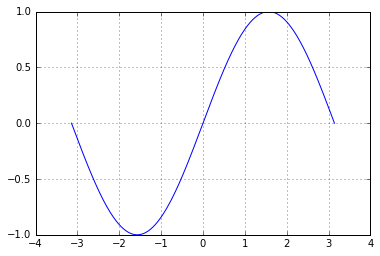

In [3]:
x = linspace(-pi, pi, 1000)
y = sin(x)
plot(x, y)
grid()

In [5]:
def sinabout7(x):
    y = x - x**3/fact(3) + x**5/fact(5) - x**7/fact(7)
    return y

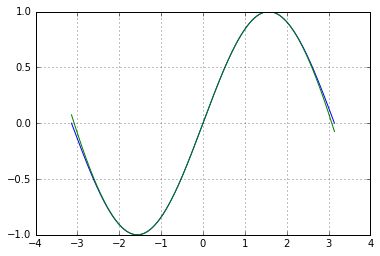

In [6]:
y7 = sinabout7(x)
plot(x, y)
plot(x, y7)
grid()

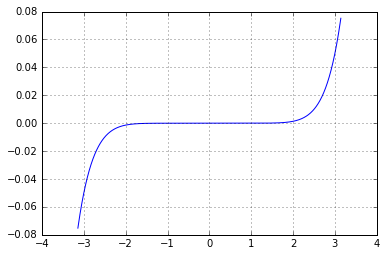

In [7]:
plot(x, y - y7)
grid()

In [8]:
def sinabout5(x):
    y = x - x**3/fact(3) + x**5/fact(5)
    return y

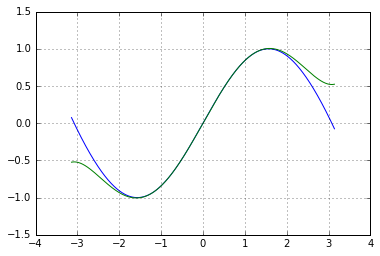

In [9]:
y5 = sinabout5(x)
plot(x, y7)
plot(x, y5)
grid()

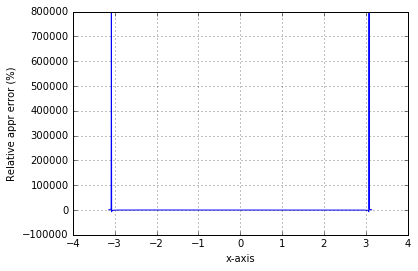

In [20]:
ea = (y7 - y5)/y7
plot(x, ea*100)
ylabel('Relative appr error (%)')
xlabel('x-axis')
grid()

In [37]:
n = 3
(-1)**(n), (2*n+1)

(-1, 7)

In [31]:
def sinabout(x, N):
    y = x
    for n in range(1, N):
        plus = (-1)**n
        y = y + plus*x**(2*n+1)/fact(2*n+1)
    return y

maximum error: 2.11425675583e-05


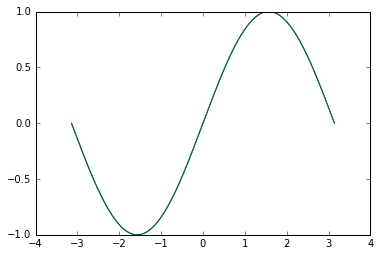

In [58]:
ya = sinabout(x, 7)
plot(x, y)
plot(x, ya)
print('maximum error:', max(abs(y - ya)))

# Problem 3
Solve graphically

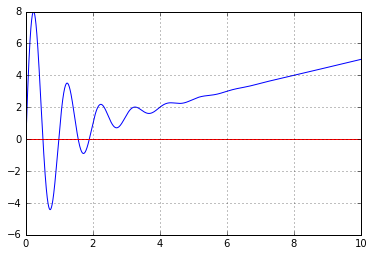

In [82]:
x = linspace(0, 10, 100000)
y = 10.0*exp(-x)*sin(2*pi*x) + 0.5*x
plot(x, y)
axhline(y=.0, xmin=0.0, xmax=10.0, color = "r")
grid()

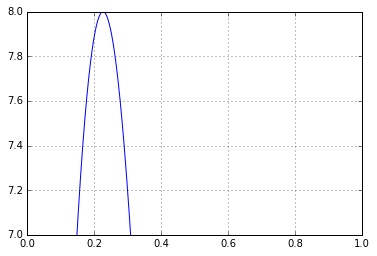

In [88]:
plot(x, y)
xlim([0, 1])
ylim([7, 8])
grid()

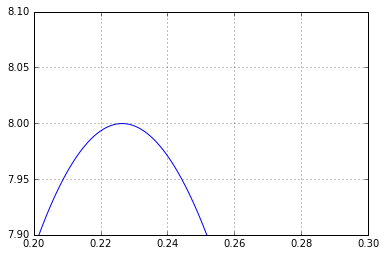

In [87]:
plot(x, y)
xlim([0.2, 0.3])
ylim([7.9, 8.1])
grid()

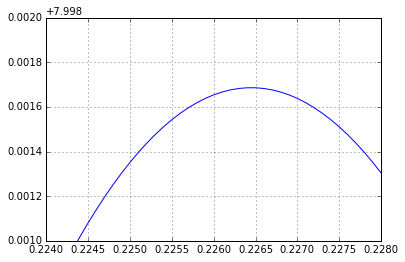

In [86]:
plot(x, y)
xlim([0.224, 0.228])
ylim([7.999, 8.000])
grid()

Maximum at x = 0.2265, f(x) = 7.9980 + 0.0017 = 7.9997 ~ 8.000

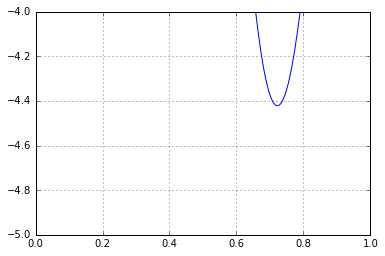

In [90]:
plot(x, y)
xlim([0, 1])
ylim([-5, -4])
grid()

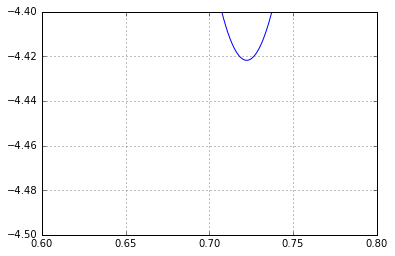

In [91]:
plot(x, y)
xlim([0.6, 0.8])
ylim([-4.5, -4.4])
grid()

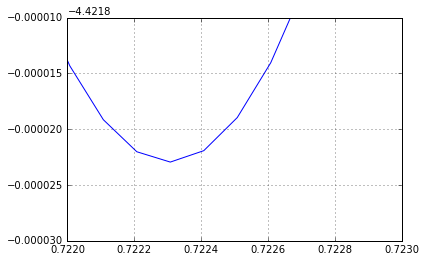

In [100]:
plot(x, y)
xlim([0.722, 0.723])
ylim(-4.42177 + array([-0.00006, -0.00004]))
grid()

Minimum when x = 0.7223, then f(x) = -4.4218

# Problem 4
Backward substitution for Gaussian elimination

In [128]:
def GaussianElimination(a , b):
    a = a.copy().astype(float)
    b = b.copy().astype(float)
    n = len(a)
    for k in range(n):
        # Check
        if a[k, k] == 0 :
            print(' Unable to solve ')
            return None
        # Forward eliminate
        for i in range(k+1, n):
            factor = a[i, k]/a[k , k]
            for j in range(k+1, n):
                a[i , j] = a[i , j] - factor*a[k , j]
            b[i] = b[i] - factor*b[k]
    
    # Backward substitution
    # Do the calculations in place, e.g. x = b
    for i in range(n-1, -1, -1):
        for j in range(i+1, n):
            b[i] = b[i] - a[i, j]*b[j]
        b[i] = b[i]/a[i, i]
    return b

In [129]:
A = array([3., 2, 1, 1, 1, 1, 5, 1, 2]).reshape(3, 3)
b = array([1., 2, 3])
print('A:\n', A)
print('b: ', b)

A:
 [[ 3.  2.  1.]
 [ 1.  1.  1.]
 [ 5.  1.  2.]]
b:  [ 1.  2.  3.]


In [130]:
solve(A, b)

array([-0.4, -0.2,  2.6])

In [127]:
x = GaussianElimination(A, b)
print(x)

[-0.4 -0.2  2.6]


In [111]:
13/5

2.6

# Problem 5
$$Ax = b$$
$$ 0 = b - Ax$$
$$ x = x + b - Ax$$
$$ x = \alpha x + (1 -\alpha)(b - Ax)$$


In [200]:
A = array([-2., 5, 9, 7, 1, 1, -3, 7, -1]).reshape(3, 3)
b = array([1., 6, -26])
print(A)
print(b)
solve(A, b)

[[-2.  5.  9.]
 [ 7.  1.  1.]
 [-3.  7. -1.]]
[  1.   6. -26.]


array([ 1., -3.,  2.])

In [201]:
# Pivot the rows
p = [1, 2, 0]
A = A[p, :]
b = b[p]
print(A)
print(b)
solve(A, b)

[[ 7.  1.  1.]
 [-3.  7. -1.]
 [-2.  5.  9.]]
[  6. -26.   1.]


array([ 1., -3.,  2.])

In [235]:
# Improved Gauss-Seidel algorithm from week 5 exercise
def gaussSeidel(A, b, x0, maxiter = 100, tol = 1e-8, alpha = 0.15):
    n = len(x0)
    x = x0
    for k in range(maxiter):
        xold = x.copy()
        for i in range(n):
            s = 0
            for j in range(n):
                if j != i:
                    s = s + A[i, j]*x[j]
            x[i] = 1/A[i, i]*(b[i] - s)
        if sum(abs(x - xold))/n < tol:
            return x, k
        x = alpha*xold + (1 - alpha)*x
    return x, k

In [237]:
x0 = array([1, 0, 0.])
x, n = gaussSeidel(A, b, x0)
print('x: ', x)
print('Iterations: ', n)

x:  [ 1. -3.  2.]
Iterations:  10
